In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Import amd clean data


In [3]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df = pd.read_csv('auto.csv',names = headers)

In [4]:
df.head(3)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [5]:
df=df.replace('?',np.NaN)
df.dropna(subset=["price"], axis=0, inplace=True)
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [7]:
miss_value = df.isnull().sum()
miss_value.loc[miss_value > 0]

normalized-losses    37
num-of-doors          2
bore                  4
stroke                4
horsepower            2
peak-rpm              2
dtype: int64

In [8]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
avg_bore=df['bore'].astype('float').mean(axis=0)
avg_stroke = df["stroke"].astype("float").mean(axis=0)
avg_horsepower = df["horsepower"].astype("float").mean(axis=0)
avg_peakrpm = df["peak-rpm"].astype("float").mean(axis=0)

In [9]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)
df["bore"].replace(np.nan, avg_bore, inplace=True)
df["stroke"].replace(np.nan, avg_stroke, inplace=True)
df["horsepower"].replace(np.nan, avg_horsepower, inplace=True)
df["peak-rpm"].replace(np.nan, avg_peakrpm, inplace=True)


In [10]:
df['num-of-doors'].mode()


0    four
Name: num-of-doors, dtype: object

In [11]:
df["num-of-doors"].replace(np.nan, "four", inplace=True)


In [12]:
df.isnull().sum()


symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Format data


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non-null

In [14]:
df[["bore", "stroke","price","peak-rpm","horsepower"]] =df[["bore", "stroke","price","peak-rpm","horsepower"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")

Exploratory Data Analyst


<Axes: >

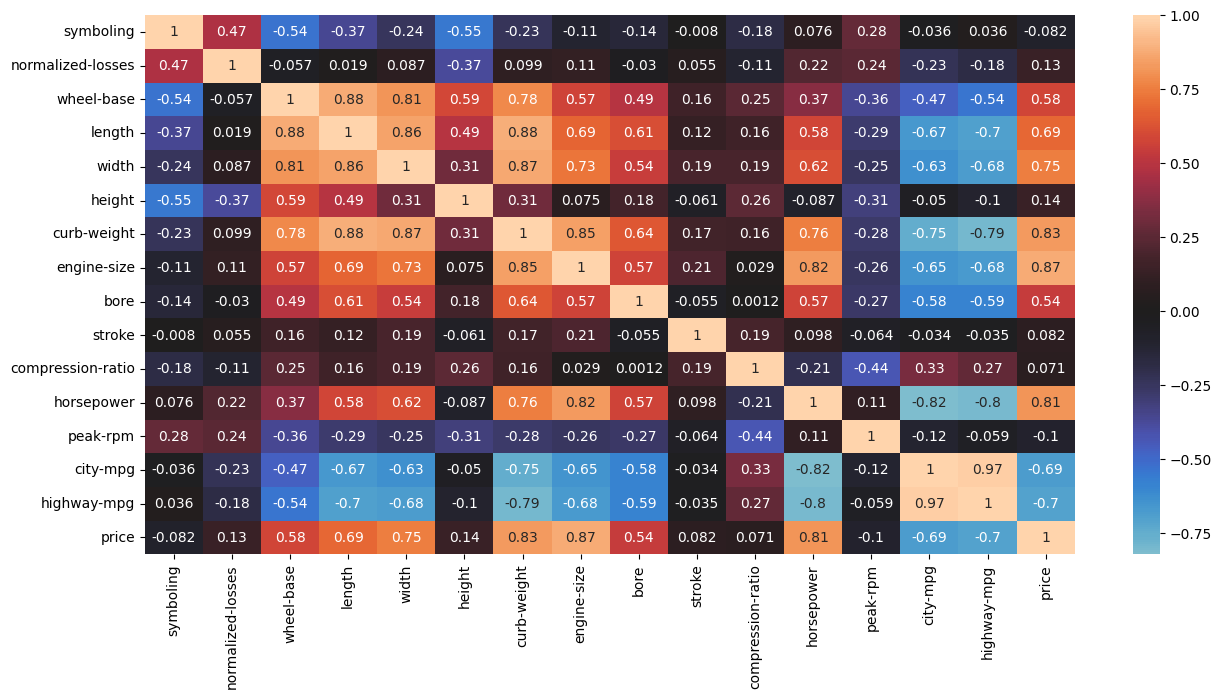

In [16]:
corrmat= df.corr(numeric_only=True)
corrmat["price"].sort_values()
plt.figure(figsize=(15,7))  
sns.heatmap(corrmat,annot=True,center=0)

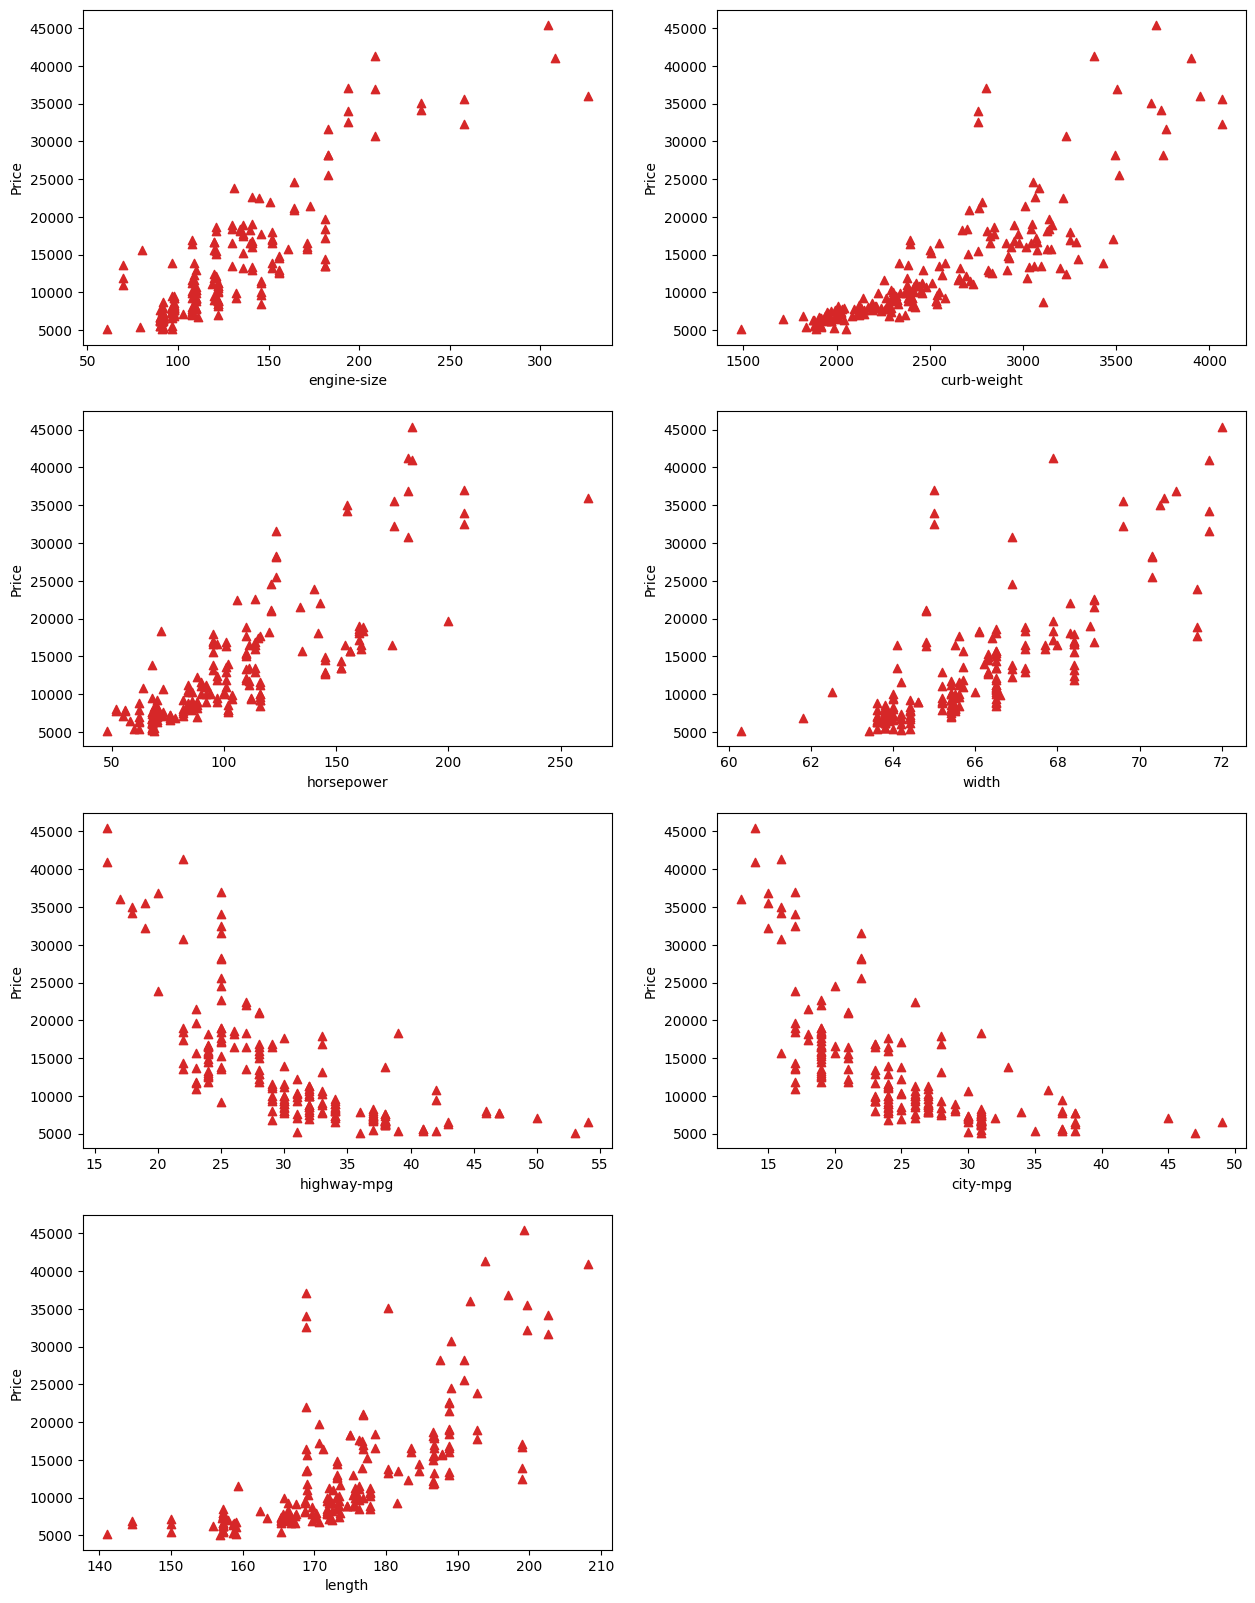

In [17]:
def pairs(x, fig):
  plt.subplot(4, 2, fig)
  plt.scatter(df[x], df['price'],c='#d62728',alpha=1,marker='^')
  plt.xlabel(x)
  plt.ylabel('Price')
  
plt.figure(figsize=(15,20))
pairs('engine-size', 1)
pairs('curb-weight', 2)
pairs('horsepower', 3)
pairs('width', 4)
pairs('highway-mpg', 5)
pairs('city-mpg', 6)
pairs('length', 7)

From the above results, The top predictors/independent variables from numerical data are:

1. engine-size: Positive Correlation
2. curb-weight: Positive Correlation
3. horspower : Positive Correlation
4. width : Positive Correlation
5. highway-mpg: Negative Correlation
6. cit-mpg : Negative Correlation
7. length : Positive Correlation


In [18]:
df.select_dtypes(include='object').columns.tolist()

['make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system']

<Axes: xlabel='make', ylabel='price'>

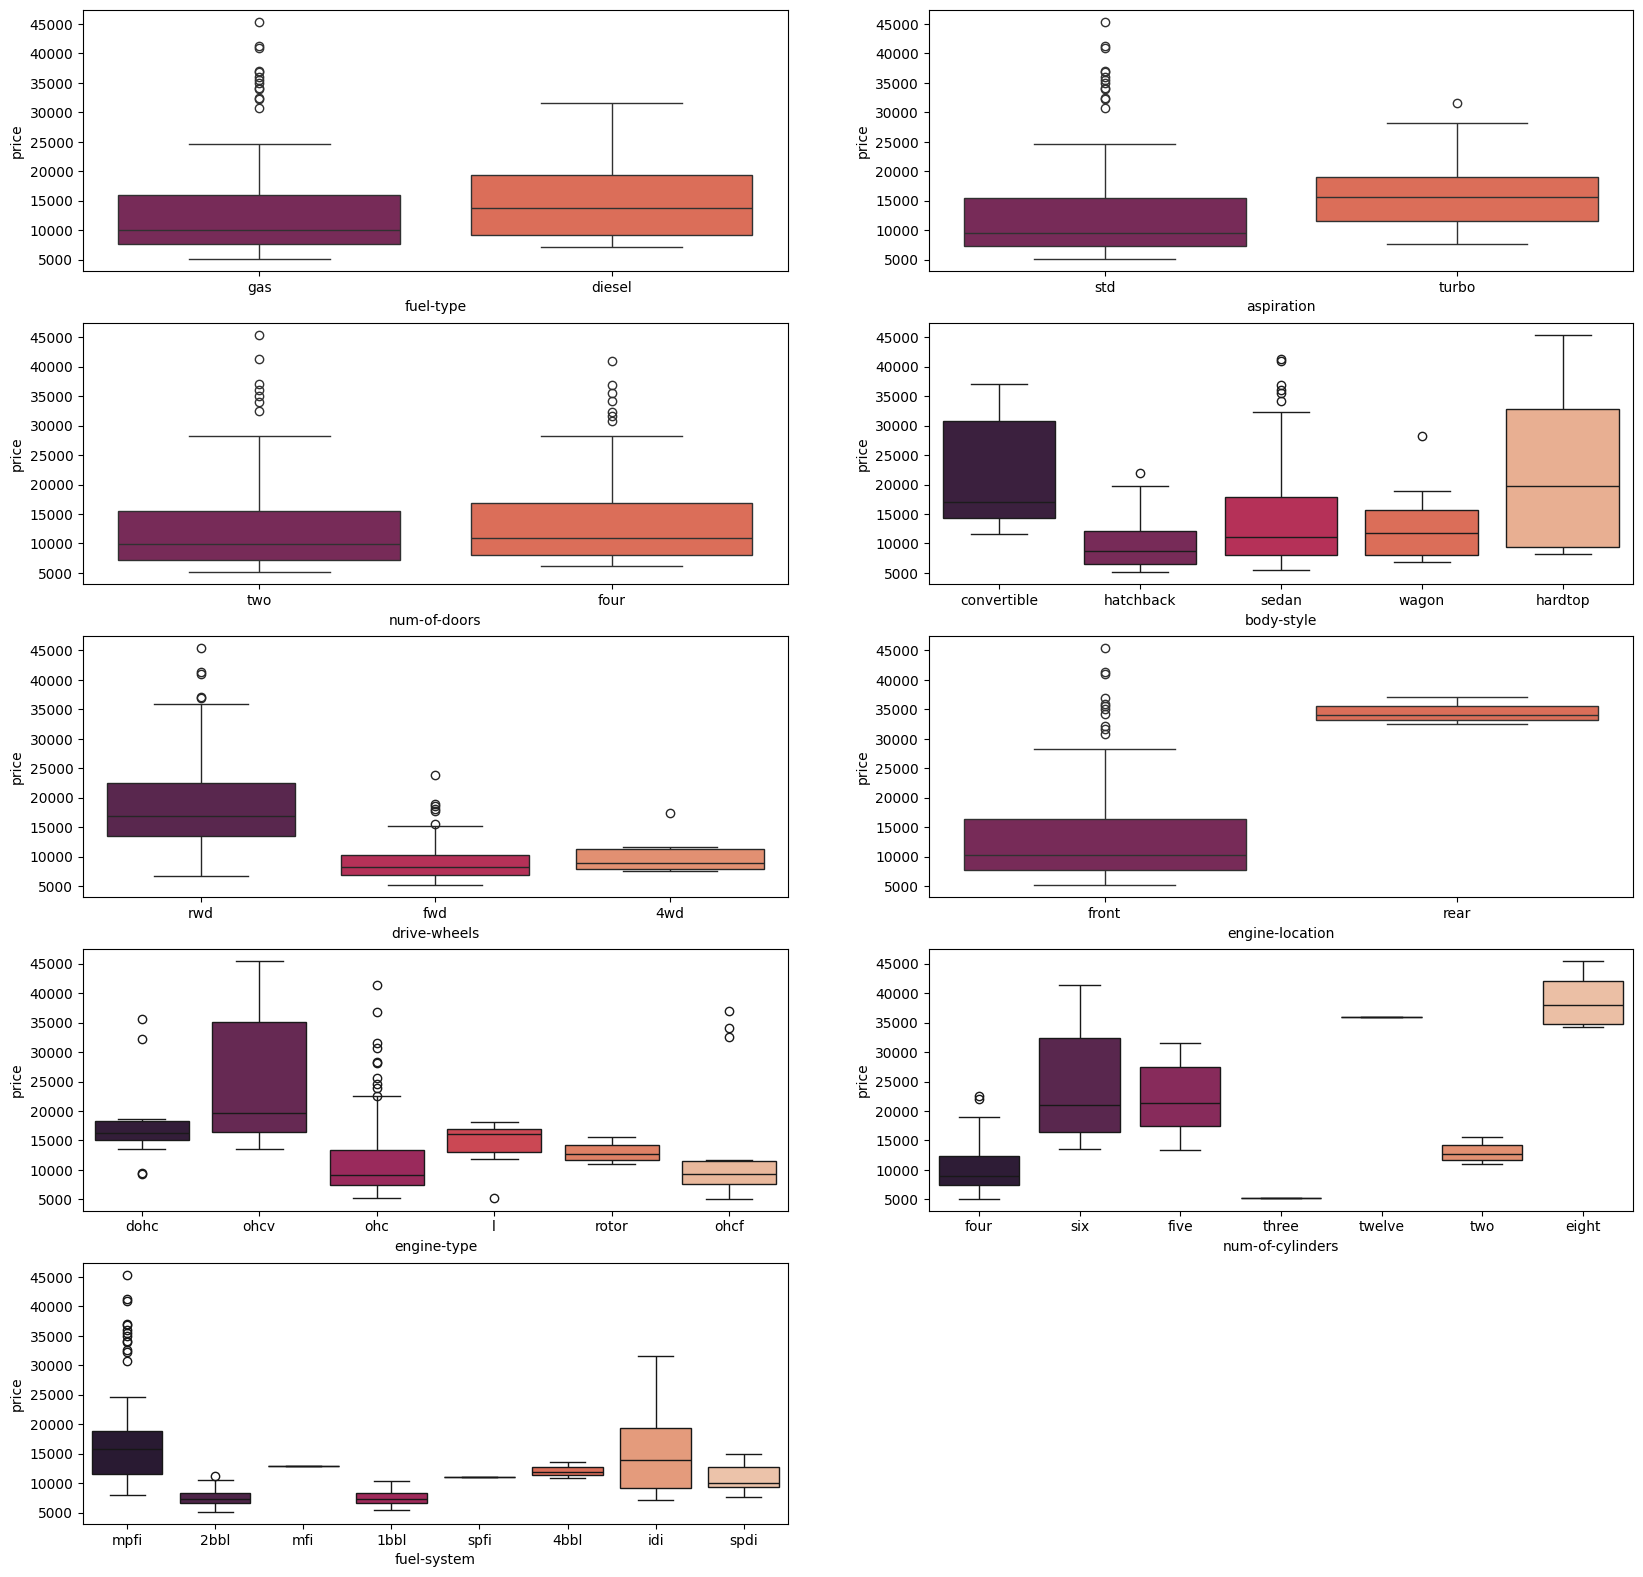

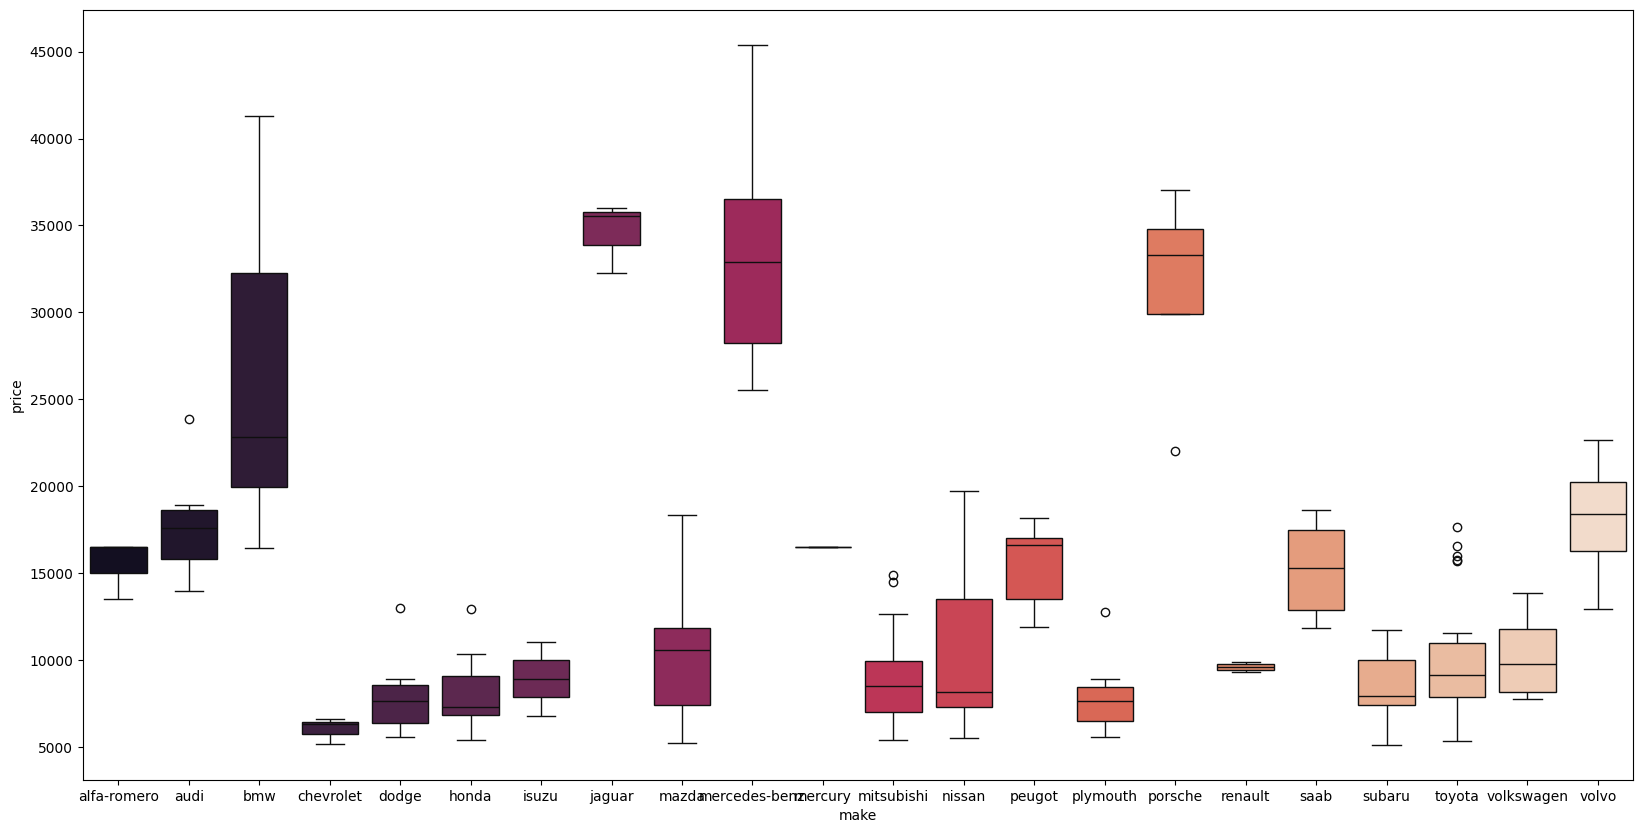

In [19]:
def plots(data, fig):
  plt.subplot(10,2,fig)
  sns.boxplot(x = data,y="price", data = df,palette=("rocket"))

plt.figure(figsize=(20,40))
plt.tight_layout()
plots('fuel-type', 1)
plots('aspiration', 2)
plots('num-of-doors', 3)
plots('body-style', 4)
plots('drive-wheels', 5)
plots('engine-location', 6)
plots('engine-type', 7)
plots('num-of-cylinders', 8)
plots('fuel-system', 9)
plt.figure(figsize=(20,10))
sns.boxplot(x ='make',y="price", data = df, palette=("rocket"))

We see that the distributions of "price" between different variables."engine-location" categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price. However, All other variables have a significant overlap, so they would not be a good predictor of price

Summary :The variables are narrowed down to the following:

Continuous numerical variables:

engine-size
curb-weight
horsepower
width
highway-mpg
city-mpg
length
Categorical variables:

engine-location
As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.


In [20]:
#Applying One-Hot Coding for engine-location (Turning Categorical variable to quantitative for modelling)
dummy = pd.get_dummies(df["engine-location"])
dummy.head()

,front,rear
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [21]:
dummy.rename(columns={'front':'engine-location-front', 'rear':'engine-location-rear'}, inplace=True)
dummy.head()

,engine-location-front,engine-location-rear
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [22]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy], axis=1)

# drop original column "fuel-type" from "df"
df.drop("engine-location", axis = 1, inplace=True)

In [23]:
#Considering Significant predictor variables
model_data = df[["engine-size","curb-weight","horsepower","width","highway-mpg","city-mpg","length","engine-location-front","engine-location-rear"]]

In [24]:
model_data.head(3)


,engine-size,curb-weight,horsepower,width,highway-mpg,city-mpg,length,engine-location-front,engine-location-rear
0,130,2548,111.0,64.1,27,21,168.8,True,False
1,130,2548,111.0,64.1,27,21,168.8,True,False
2,152,2823,154.0,65.5,26,19,171.2,True,False


In [25]:
#Normalization: required to bring range of value into similar range 
scaler = StandardScaler()
x_data = scaler.fit_transform(model_data)
x_data = pd.DataFrame(x_data)

In [26]:
x_data.columns = ["engine-size","curb-weight","horsepower","width","highway-mpg","city-mpg","length","engine-location-front","engine-location-rear"]
x_data.head()

,engine-size,curb-weight,horsepower,width,highway-mpg,city-mpg,length,engine-location-front,engine-location-rear
0,0.075389,-0.014858,0.203984,-0.853460,-0.542288,-0.652249,-0.439409,0.123091,-0.123091
1,0.075389,-0.014858,0.203984,-0.853460,-0.542288,-0.652249,-0.439409,0.123091,-0.123091
2,0.606234,0.518080,1.357649,-0.185597,-0.689386,-0.964397,-0.244152,0.123091,-0.123091
3,-0.431327,-0.423766,-0.037480,0.148335,-0.100993,-0.184027,0.195176,0.123091,-0.123091
4,0.220165,0.520017,0.311302,0.243744,-1.277779,-1.120471,0.195176,0.123091,-0.123091


In [27]:
y_data = df["price"]
y_data

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 201, dtype: float64

Model Development


In [28]:
#Spliting test and train data with standard ratio
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.4,random_state=1)
print("shape of x_train",x_train.shape)
print("shape of y_train",y_train.shape)
print("shape of x_test",x_test.shape)
print("shape of y_test",y_test.shape)

shape of x_train (120, 9)
shape of y_train (120,)
shape of x_test (81, 9)
shape of y_test (81,)


Linear Regression


In [29]:
lm = LinearRegression() 
lm.fit(x_train,y_train)


LinearRegression()

In [30]:
yhat_MLR = lm.predict(x_test)
print("Predicted price for test data are:", yhat_MLR[0:5].tolist())

Predicted price for test data are: [11168.232839578784, 5282.996582655759, 12469.24118141518, 5768.953182291486, 14942.596020446223]


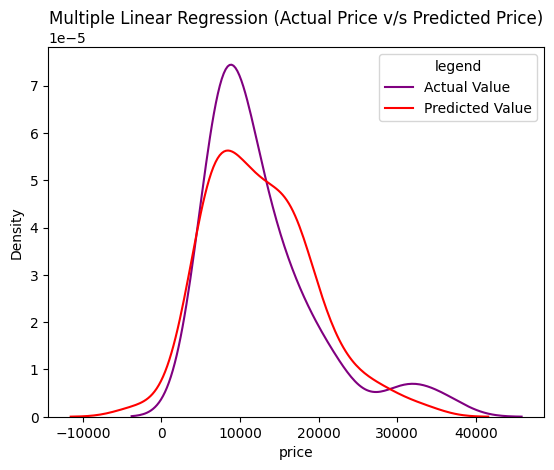

In [31]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
plt.title("Multiple Linear Regression (Actual Price v/s Predicted Price)")
ax1 = sns.distplot(y_test,hist=False,color="purple",label="Actual Value")
sns.distplot(yhat_MLR,hist=False,color='red',label="Fitted Value",ax=ax1)
plt.legend(title='legend', loc='upper right', labels=['Actual Value', 'Predicted Value'])
plt.show()

In [51]:
mse_lr = mean_squared_error(y_test, yhat_MLR)
print('The mean square error of price and predicted value is: ', mse_lr)

The mean square error of price and predicted value is:  11810127.28950637


In [52]:
#R-Squared
r_squared_lr = lm.score(x_train,y_train)
print('the R-Squared value of fitted model is:', r_squared_lr)

the R-Squared value of fitted model is: 0.87821798354801


Ridge Regression


In [34]:
#Identifing value of Alpha using auto iterative method called GridSearchCV().
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}] #initializing alpha value to obtain best one.
RR=Ridge()
Grid1 = GridSearchCV(RR, parameters1,cv=4)
Grid1.fit(x_data, y_data)
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10)

In [35]:
#Creating object though which instances can be created in further steps.
RidgeModel = Ridge(alpha=10)
#Fitting Ridge model
RidgeModel.fit(x_train,y_train)

Ridge(alpha=10)

In [36]:
yhat_Ridge = RidgeModel.predict(x_test)


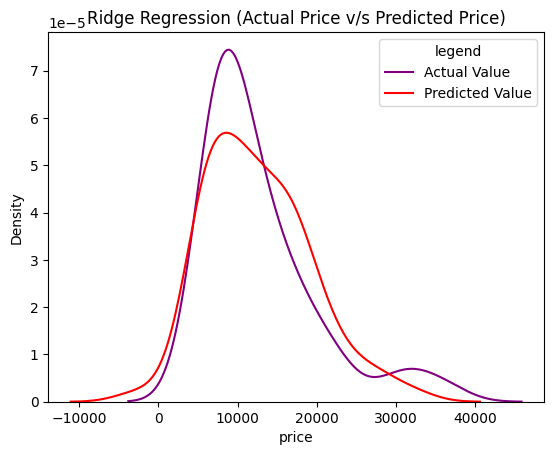

In [37]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
plt.title("Ridge Regression (Actual Price v/s Predicted Price)")
ax1 = sns.distplot(y_test,hist=False,color="purple",label="Actual Value")
sns.distplot(yhat_Ridge,hist=False,color="r",label="Fitted Value",ax=ax1)
plt.legend(title='legend', loc='upper right', labels=['Actual Value', 'Predicted Value'])
plt.show()

In [41]:
#Mean Squared Error(MSE)
mse_rr = mean_squared_error(y_test, yhat_Ridge)
print('The mean square error of price and predicted value is: ', mse_rr)

The mean square error of price and predicted value is:  11497260.176787565


In [40]:
#R-Squared
r_squared_rr = RidgeModel.score(x_train,y_train)
print('the R-Squared value of fitted model is:',r_squared_rr)

the R-Squared value of fitted model is: 0.8761679017052117


Polynomial Regression


In [43]:
#Creating object though which instances can be created in further steps.
PolyModel=PolynomialFeatures(degree=2)  # Degree 2 is fixed after trail and error as its o/p was top.

In [44]:
#Transforming data to feed polynomial model
x_train_pr=PolyModel.fit_transform(x_train)
x_test_pr=PolyModel.fit_transform(x_test)

In [45]:
poly1=LinearRegression().fit(x_train_pr,y_train)

In [46]:
yhat_poly=poly1.predict(x_test_pr)

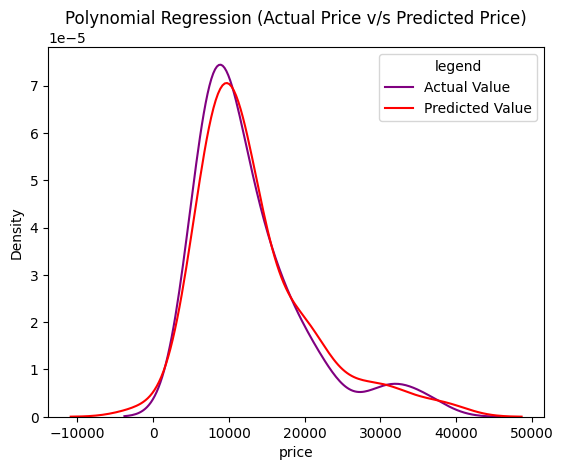

In [47]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
plt.title("Polynomial Regression (Actual Price v/s Predicted Price)")
ax1 = sns.distplot(y_test,hist=False,color="purple",label="Actual Value")
sns.distplot(yhat_poly,hist=False,color="r",label="Fitted Value",ax=ax1)
plt.legend(title='legend', loc='upper right', labels=['Actual Value', 'Predicted Value'])
plt.show()

In [48]:
mse_pr = mean_squared_error(y_test, yhat_poly)
print('The mean square error of price and predicted value is: ', mse_pr)

The mean square error of price and predicted value is:  13657800.514230987


In [49]:
r_squared_pr = poly1.score(x_train_pr,y_train)
print('the R-Squared value of fitted model is:',r_squared_pr)

the R-Squared value of fitted model is: 0.9496649792978403


In [53]:
df_summary = pd.DataFrame({'Model': ['Multiple Linear Regression', 'Ridge Regression', 'Polynomial Regression'] , 'Mean Squared Error': [mse_lr, mse_rr, mse_pr], 'R-Squared': [r_squared_lr, r_squared_rr, r_squared_pr]})
df_summary

,Model,Mean Squared Error,R-Squared
0,Multiple Linear Regression,1.181013e+07,0.878218
1,Ridge Regression,1.149726e+07,0.876168
2,Polynomial Regression,1.365780e+07,0.949665
